In [99]:
# Developing Unit Tests for Membrane Potential
import numpy as np 
import scipy.io as sio
from scipy.signal import find_peaks, butter, filtfilt

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Load the data file
mat_data = sio.loadmat('../../MatLab Analysis/Data/157010023Comp.mat')
data = mat_data['membPot'][0]

In [100]:
# Data Information
sampling_freq = 1000
time_vector = np.arange(0, data.shape[0]) / sampling_freq
data = data - np.mean(data) # detrend

In [101]:
# Identify Dynamic Threshold for Spiking
amp_thresh = np.mean(data) + 2 * np.std(data)
amp_plot_line = amp_thresh * np.ones(len(time_vector),dtype = int)

# Identify Spike Surpassing threshold
peaks = find_peaks(data, height = amp_thresh)

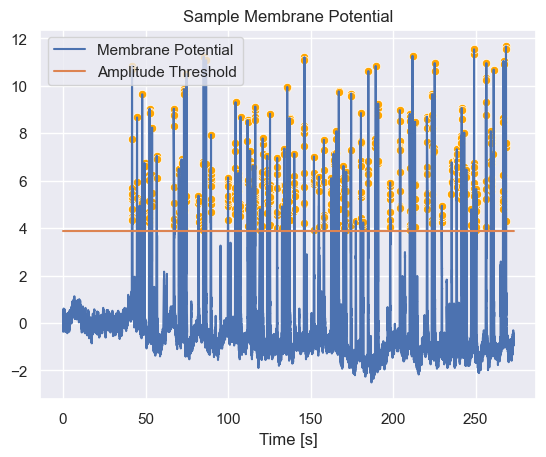

In [102]:
# Plotting (just to check data)
start_indx = 50 * sampling_freq
stop_indx = 100 * sampling_freq

sns.lineplot(x = time_vector, y = data, label = 'Membrane Potential')
sns.lineplot(x = time_vector, y = amp_plot_line, label = 'Amplitude Threshold')
sns.scatterplot( x = time_vector[peaks[0]], y = data[peaks[0]], color = 'orange')
    
plt.title('Sample Membrane Potential')
plt.xlabel('Time [s]')
plt.show()

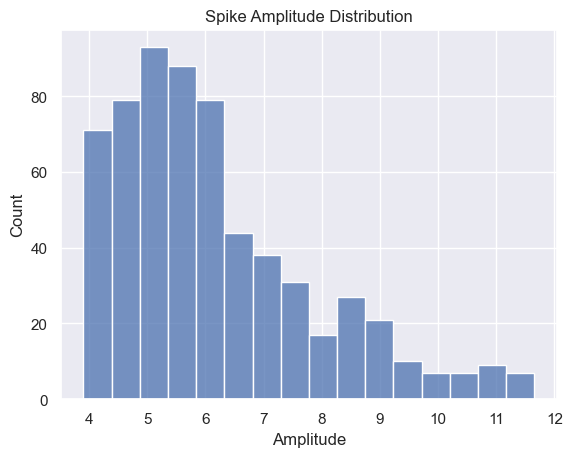

In [103]:
# Characterizing the Neurons Morphology

# Amplitude 
sns.histplot(data[peaks[0]])
plt.title('Spike Amplitude Distribution')
plt.xlabel('Amplitude')
plt.show()

In [104]:
# Loop through peaks and calculate the 
spike_widths = []

for peak_indx in peaks[0]:

    # Lets get the width
    peak_height = data[peak_indx]
    left_indx = peak_indx
    right_indx = peak_indx

    # Move until you reach the value
    while left_indx > 0 and data[left_indx] > (peak_height / 2):
        left_indx -= 1

    while right_indx < len(data) and data[right_indx] > (peak_height / 2):
        right_indx += 1

    width = (right_indx - left_indx)/ sampling_freq
    spike_widths.append(width)

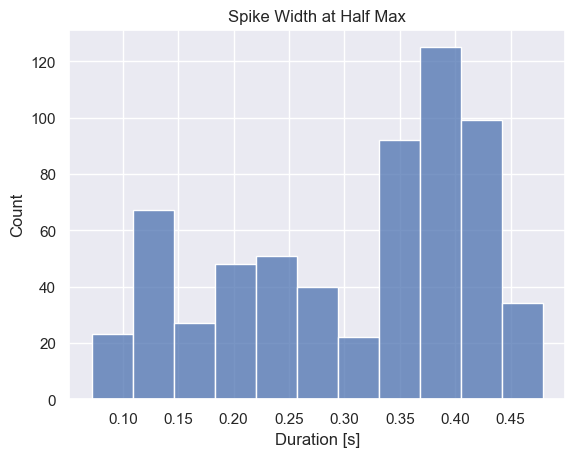

In [106]:
# Plotting the Spike Width at Half Max
sns.histplot(spike_widths)
plt.title('Spike Width at Half Max')
plt.xlabel('Duration [s]')
plt.show()